# 1. Multiplication Table

 - 구구단을 출력하는 함수이다.
 
 
 - 총 3개의 단씩 출력하기 위해 3개의 반복문을 사용한다.

In [1]:
# 1,4,7을 반복한다.
for i in range(0,8,3) :
    # 1,2,...,9 를 반복한다.
    for j in range(1,10,1) :
        # 1,2,3, 4,5,6, 그리고 7,8,9 를 반복한다.
        for k in range(1,4,1) : 
            print("{} X {} = {:2}" .format(k+i,j,(k+i)*j), end="\t")
        print()
    print()

1 X 1 =  1	2 X 1 =  2	3 X 1 =  3	
1 X 2 =  2	2 X 2 =  4	3 X 2 =  6	
1 X 3 =  3	2 X 3 =  6	3 X 3 =  9	
1 X 4 =  4	2 X 4 =  8	3 X 4 = 12	
1 X 5 =  5	2 X 5 = 10	3 X 5 = 15	
1 X 6 =  6	2 X 6 = 12	3 X 6 = 18	
1 X 7 =  7	2 X 7 = 14	3 X 7 = 21	
1 X 8 =  8	2 X 8 = 16	3 X 8 = 24	
1 X 9 =  9	2 X 9 = 18	3 X 9 = 27	

4 X 1 =  4	5 X 1 =  5	6 X 1 =  6	
4 X 2 =  8	5 X 2 = 10	6 X 2 = 12	
4 X 3 = 12	5 X 3 = 15	6 X 3 = 18	
4 X 4 = 16	5 X 4 = 20	6 X 4 = 24	
4 X 5 = 20	5 X 5 = 25	6 X 5 = 30	
4 X 6 = 24	5 X 6 = 30	6 X 6 = 36	
4 X 7 = 28	5 X 7 = 35	6 X 7 = 42	
4 X 8 = 32	5 X 8 = 40	6 X 8 = 48	
4 X 9 = 36	5 X 9 = 45	6 X 9 = 54	

7 X 1 =  7	8 X 1 =  8	9 X 1 =  9	
7 X 2 = 14	8 X 2 = 16	9 X 2 = 18	
7 X 3 = 21	8 X 3 = 24	9 X 3 = 27	
7 X 4 = 28	8 X 4 = 32	9 X 4 = 36	
7 X 5 = 35	8 X 5 = 40	9 X 5 = 45	
7 X 6 = 42	8 X 6 = 48	9 X 6 = 54	
7 X 7 = 49	8 X 7 = 56	9 X 7 = 63	
7 X 8 = 56	8 X 8 = 64	9 X 8 = 72	
7 X 9 = 63	8 X 9 = 72	9 X 9 = 81	



# 2. Bisection Method

 - 구간을 설정하고, 그 구간의 이등분으로 나눠서 왼쪽 오른쪽 중 해가 있는 곳을 찾고, 다시 그 구간을 또 이등분하여, 점차 해가 있는 구간을 좁혀가면서 함수의 해를 찾는 방법이다.
 
 
 - 오차(eps)를 설정하고, 구간이 오차보다 작아질 때마다 반복하며, 오차보다 구간이 작아지면 그 때의 가운데 값을 해로 출력한다.

![figure](./figure/fig10.png)

![figure](./figure/fig01.png)

In [2]:
# 수학 계산에 필요한 라이브러리 호출
import math

# 함수 생성 : 
def f(x) : 
    return math.exp(-abs(x)) - x/(1+x*x)

# Bisection Method
def bisection(x0, x1, eps=0.00001) :
    # 초기값 지정
    fx0, fx1 = f(x0), f(x1)
    # 두 수 사이에 해가 존재하지 않음
    if (fx0 * fx1) > 0 : 
        print("Wrong guess")
    # 두 수의 차이가 오차(eps=0.00001)보다 작을 때 까지 계속 반복
    while abs(x0 - x1) > eps : 
        # 두 수 사이의 가운데 값 생성
        x2 = (x0 + x1) / 2
        fx2 = f(x2)
        # 왼쪽 오른쪽 중 해가 있는 곳을 찾아 다시 분할하기
        if (fx0 * fx2) < 0 : x1,fx1 = x2,fx2  
        else : x0, fx0 = x2, fx2
    return (x0 + x1)/2

# 함수 실행
print("Solution = " + str(bisection(0,2)))

Solution = 0.7384300231933594


# 3. Newton Method

 - 수치해석학에서, 뉴턴 방법(영어: Newton's method)은 실숫값 함수의 영점을 근사하는 방법의 하나이다.

![figure](./figure/fig10.png)

![figure](./figure/fig04.png)

![figure](./figure/fig05.png)

![figure](./figure/fig06.png)

In [3]:
import math

# 함수 f
def f(x) : 
    return math.exp(-abs(x)) - x/(1 + x*x)

# 함수 f의 미분
def f_d(x) : 
    xsqr = x*x
    fp = (xsqr - 1)/((1+xsqr)*(1+xsqr)) + -math.exp(-x) if x>0 else math.exp(x)
    return(fp)
    
# Newton Method
def newton(x,f,f_d,eps=0.00001):
    fx=f(x)
    for _ in range(30):
        x = x - fx/f_d(x)
        fx = f(x)
        if abs(fx) < eps :
            return x
    print("no solution")
    return()

# Test Run
print("Newton Method = " + str(newton(x=1, f=f, f_d=f_d)))

Newton Method = 0.7384323906731126


# 4. Fibonacci Sequence

 - 피보나치 수열이란, 첫째항과 둘째항은 "1"이고, 세번째항 부터는 이전 2개의 항의 합으로 이루어지는 수열이다.
 
 
 - 1, 1, 2, 3, 5, 8, 13, ...
 
 
 - 재귀함수란, 함수를 정의할 때, 정의하고자 하는 함수를 그 안에서 자기 자신을 불러내어 정의한 함수이다.

![figure](./figure/fig02.png)

In [4]:
# 재귀 함수를 이용한 피보나치 수열
def Fibonacci(n) :
    if n == 1 or n == 2 :     
        return 1
    else :
        return Fibonacci(n-1) + Fibonacci(n-2)

# 생성된 결과 출력
for i in range(1,11,1) :     
    if i == 1 : 
        print("== Fibonacci Sequence ==")
    print("{}" .format(Fibonacci(i)), end="  ")

== Fibonacci Sequence ==
1  1  2  3  5  8  13  21  34  55  

# 5. Gaussian Elimination

 - 가우스 소거법은 행렬의 연산을 이용하여, 연립 1차 방정식의 해를 구하는 방법이다.
 
 
 - 알고리즘의 핵심은, 기약행 사다리꼴 행렬을 만드는 것이다.

$$
\begin{pmatrix} 
   3 & 1 & -1 \\
   1 & 4 & 1 \\
   2 & 1 & 2
\end{pmatrix}
\begin{pmatrix} 
   x \\
   y \\
   z
\end{pmatrix}
\quad
 = 
\quad
\begin{pmatrix} 
   2 \\
   12 \\
   10
\end{pmatrix}
$$

![figure](./figure/fig03.png)

In [5]:
A = [[3,1,-1],[1,4,1],[2,1,2]]
B = [2,12,10]
X = [0,0,0]
N = 3

# 행사다리꼴 만들기
for i in range(N-1) :      
    for k in range(i+1,N) :                      
        piv = -A[k][i] / A[i][i]                 
        for j in range(i+1,N) :                  
            A[k][j] = A[k][j] + piv * A[i][j]    
        B[k] = B[k] + piv * B[i]                 
          
# 기약행사다리꼴 행렬의 모양을 완성
A[1][0], A[2][0], A[2][1] = 0, 0, 0              
X[N-1] = B[N-1] / A[N-1][N-1]                   

# 계산할 때는 역으로 밑에서부터 z를 계산하고, y를 계산하고,...
for i in range(N-2, -1, -1) : 
    xsum = 0
    for k in range(i+1, N) : 
        xsum = xsum + A[i][k] * X[k]
    X[i] = (B[i] - xsum) / A[i][i]

print("x = {}, y = {}, z = {}" .format(round(X[0],2), round(X[1],2), round(X[2],2)))

x = 1.0, y = 2.0, z = 3.0


# 6. Magic Sqaure

 - 마방진은 일정한 칸 안에 자연수 1부터 중복이나 빠짐없이 배열하여 가로와 세로의 합이 동일하도록 만드는 숫자표이다.

![figure](./figure/fig07.png)

![figure](./figure/fig08.png)

In [6]:
import numpy as np

def magic_square(n) :
    # 입력 받은 숫자가 짝수일 경우 에러 출력
    if n % 2 == 0 :
        print("Number is not odd!!!")
        return 0
    # nXn의 0으로 채워진 행렬 생성
    matrix = np.zeros((n,n))
    # 초기값 지정
    x, y, value = 0, int(n/2), 1
    # 시작 위치 1 지정
    matrix[x,y] = value
    # 나머지 칸 채우기 : 2 ~ 25
    for value in range(2, n*n+1) :
        # 위로 한 칸 상승, 왼쪽으로 한 칸 이동
        x, y = x-1, y-1
        # 더이상 왼쪽으로 이동할 수 없는 경우 반대편으로 이동
        if x < 0 and y >= 0 :
            x = n-1
        # 더 이상 위로 올라갈 수 없는 경우 반대편으로 이동
        elif x >= 0 and y < 0 :
            y = n-1
        # 가야할 자리가 맨 왼쪽 위 대각선인 경우 원래 자리에서 한 칸 아래로 이동
        elif x < 0 and y < 0 :
            x = x+2
            y = y+1
        # 가야할 곳이 빈자리가 아닌 경우 원래 자리에서 한 칸 아래로 이동
        elif matrix[x,y] != 0 :
            x = x+2
            y = y+1
        # 값 채워 넣기
        matrix[x,y] = value
        
    # 마방진 출력
    for i in range (n) :
        for j in range (n) :
            print("%2d" %matrix[i][j], end="\t")
        print ()
        
    # 반환
    return None

# 5X5 마방진
magic_square(5)

15	 8	 1	24	17	
16	14	 7	 5	23	
22	20	13	 6	 4	
 3	21	19	12	10	
 9	 2	25	18	11	


![figure](./figure/fig11.png)

In [7]:
def mSquare ( n ) : # n : an odd number
    
    nsqr = n * n
    
    M = [[0 for col in range (n)] for row in range (n)]
    i = 0
    j = int ((n+1)/2) - 1
    M[i][j] = 1
    
    for k in range (2, nsqr+1) :
        i = i - 1
        j = j - 1
        if (i >= 0) & (j >= 0) :
            if (M[i][j] != 0 ) :
                i = i + 2
                j = j + 1
        else :
            if (i == -1) :
                if ( j == -1):
                    i = i + 2
                    j = j + 1     
                else : i = n - 1
            else : j = n - 1
        M[i][j] = k
    for i in range (n) :
        for j in range (n) :
            print ("%2d" %(M[i][j]), end="\t")
        print()
    return None

# 마방진
mSquare(5)

15	 8	 1	24	17	
16	14	 7	 5	23	
22	20	13	 6	 4	
 3	21	19	12	10	
 9	 2	25	18	11	


# 7. Sort

In [8]:
# Data 생성
from scipy.stats import norm
x = [norm.rvs() * 5 + 170. for _ in range(10)]
x_1 = x
x_2 = x

# 정렬 함수
def sort_function (X) :
    # 주어진 데이터의 길이를 구한다.
    N = len(X)
    # 0부터 주어진 길이-1 까지 반복한다.
    for i in range(N-1):
        # 스위칭을 하기 위해 임시로 k라는 변수를 만든다.
        k = i
        # 위에 반복문에 해당하는 기준 숫자와 그 뒷숫자와 1대1로 비교하여 만약 뒷수자가 더 작으면 자리를 스위칭한다.
        for j in range(i+1,N) :
            # 인접한 두개의 숫자를 비교해서
            if X[k] > X[j] :  
                # 만약 뒷숫자가 더 작으면 인덱싱을 스위칭
                k = j
        # 스위칭된 인덱싱에 바뀐 값을 넣어준다.
        X[k],X[i] = X[i],X[k]
    # 정렬이 된 데이터를 반환한다.
    return X

# 사용자 정의 함수로 만든 데이터
print("[사용자 정의 함수로 만든 정렬 함수]")
print(sort_function(x_1), end="\n\n")

# 파이썬에 내장된 함수
print("[파이썬 내장된 정렬 함수]")
x_2.sort()
print(x_2)

[사용자 정의 함수로 만든 정렬 함수]
[159.2742651052831, 164.08294469429123, 167.17417777542465, 169.62949181675714, 170.76457248396238, 170.79704420950898, 171.13829374443182, 171.40364967420456, 171.54124540241634, 178.1833500554688]

[파이썬 내장된 정렬 함수]
[159.2742651052831, 164.08294469429123, 167.17417777542465, 169.62949181675714, 170.76457248396238, 170.79704420950898, 171.13829374443182, 171.40364967420456, 171.54124540241634, 178.1833500554688]


# 8. Object Oriented Programming

In [9]:
# 클래스 생성
class Univariate :
    
    def __init__(self, x) :
        self.x = x
        
    @staticmethod
    def sort_fn(x) :
        n = len(x)   
        for i in range(n-1):
            k = i
            for j in range(i+1,n) :
                if x[k] > x[j] : 
                    k = j
            x[k], x[i] = x[i], x[k]
        return x
    
    @staticmethod
    def quantile_fn(x,q) :
        n = len(x)
        nq = n*q
        t = int(nq)
        g = nq - t
        return (1-g)*x[t-1] + g*x[t]
    
    @staticmethod
    def summary_fn(x) :
        n = len(x)
        xbar,s2 = 0,0
        
        for i in range(n) :
            xbar = xbar + x[i]
            s2 = s2 + x[i]*x[i]
        
        # Sort
        x = Univariate.sort_fn(x)
        
        # 평균    
        xbar = xbar/n
        
        # 분산
        s2 = (s2 - n*xbar*xbar)/(n-1)
        
        # 분위수
        median = Univariate.quantile_fn(x,0.5)
        Q1 = Univariate.quantile_fn(x,0.25)
        Q3 = Univariate.quantile_fn(x,0.75)
        
        return {"Mean":round(xbar,2),"Var":round(s2,2),"Q1":round(Q1,2),"Median":round(median,2),"Q3":round(Q3,2),"Min":round(x[0],2), "Max":round(x[n-1],2)}
    
    # Hist plot    
    def histogram_plot(self, kkh=0, PLOT_LENGTH = 100):
        import math                                                               # 라이브러리 math
        n = len(self.x)                                                           # 데이터의 길이
        if kkh == 0 :                                                             # 가장 적절한 구간의 수
            kkh = 1 + int(math.log2(n) + 0.5)                                  
        x = Univariate.sort_fn(self.x)                                            # 데이터 정렬
        D = (x[n-1] - x[0]) / kkh                                                 # 구간의 크기
        nobs = [0 for _ in range(kkh)]                                            # 정답 리스트 생성
        for i in range(0,n-1)  :                                                  # 각각의 데이터를 확인
            k = int((x[i] - x[0]) / D)                                            # 몇번째 구간인지 체크
            nobs[k] = nobs[k] + 1                                                 # 해당 구간 값에 +1
        N_MAX = max(nobs)                                                         # 구간의 최대 길이 체크
        DECO = "I" + "-"*(PLOT_LENGTH-N_MAX) + "I"                                # 위아래 장식 모양
        print("  ",DECO)                                                          # 위 장식
        for i in range(kkh) :                                                     # 정답 리스트를 돌면서
            S = "I" + "*"*nobs[i] + " "*((PLOT_LENGTH-N_MAX) - nobs[i]) + "I"     # Bar 생성
            print("{:2} {}". format(nobs[i],S))                                   # 별 그리기
        print("  ",DECO)                                                          # 아래 장식
        return nobs
    
# 난수 생성
import numpy as np
x = np.random.normal(loc=170., scale=5.0, size = 100)

# Summary 함수 실행
print(Univariate.summary_fn(x), end="\n\n")

# Hist Plot 실행
aClass = Univariate(x)
aClass.histogram_plot()

{'Mean': 170.51, 'Var': 22.63, 'Q1': 167.23, 'Median': 170.43, 'Q3': 174.48, 'Min': 158.42, 'Max': 180.22}

   I----------------------------------------------------------------------------I
 3 I***                                                                         I
 7 I*******                                                                     I
10 I**********                                                                  I
18 I******************                                                          I
24 I************************                                                    I
17 I*****************                                                           I
14 I**************                                                              I
 6 I******                                                                      I
   I----------------------------------------------------------------------------I


[3, 7, 10, 18, 24, 17, 14, 6]

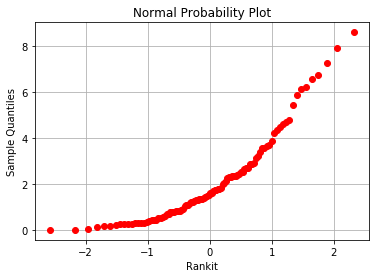

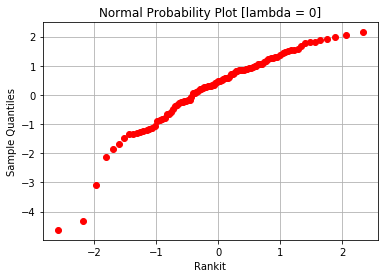

In [16]:
# 정규확률지 클래스 생성
class NormQuantPlot :
    
    def __init__(self, x, lambdax=1) :
        self.x = x
        self.lambdax = lambdax
        
    @staticmethod
    def qqplot(y, title="Normal Probability Plot", isShow=True) :
        from scipy.stats import norm
        from matplotlib import pyplot as plt    
        n = len(y)
        y.sort()
        a = [3./8., 1./2.][n>10]
        p = [((i+1)-a)/(n+1-a) for i in range(n)]
        rankits = norm.ppf(p)
        plt.plot(rankits, y, "ro")
        plt.title(title)
        plt.xlabel("Rankit")
        plt.ylabel("Sample Quantiles")
        plt.grid(True)
        if isShow : 
            plt.show( )


    def plot(self) :
        y = self.x
        if self.lambdax != 1 :
            y = NormQuantPlot.powerTransform(self.x, self.lambdax)
            NormQuantPlot.qqplot(y, title = "Normal Probability Plot" + ' [lambda = ' + str(self.lambdax) + "]")
    
    @staticmethod
    def powerTransform(x, lambdax) :
        import math
        if lambdax == 0:
            return [math.log(x[i]) for i in range(len(x))]
        else :
            return [pow(x[i], lambdax) for i in range(len(x))]
        
# 정규확률지 실행
import matplotlib.pyplot as plt
from scipy.stats import chi2  
x = [chi2.rvs(df =2) for _ in range (100) ]
NormQuantPlot.qqplot(x) 
qq = NormQuantPlot (x)
qq.plot()
plt.show()
qq.lambdax = 0 
qq.plot()
plt.show()

# 9. Im Memory Reg

In [11]:
import pandas as pd
import numpy as np

def reg(pdDFrame, dependent):
    varName = pdDFrame.keys()                 # get keys(variable name)
    y = pdDFrame[dependent].to_numpy()        # np.array of dependent variable

    xName = varName[varName != dependent]     # variable names of independent variables    
    X = pdDFrame[xName].to_numpy()            # np.array of independent variable
    
    n, k = X.shape
    
    intercept = np.ones((n,1))
    X = np.append(intercept, X, axis=1)      # add column of 1's to X matrix for intercept
    
    xName = xName.insert(0, 'intercept')     # variable names of independent variables with intercept   
    
    XpX = X.T.dot(X)                         # X'X matrix
    XpXInv = np.linalg.inv(XpX)              # (X'X)^{-1} : inverse matrix of X'X
    Xpy = X.T.dot(y)                         # X'y
    
    parm = XpXInv.dot(Xpy)                   # B = (X'X)^{-1} X'y
    
    return(pd.DataFrame({"variable": xName, "Estimate": parm}))

data = pd.read_csv("MLB.csv", sep=',', na_values=".", encoding='utf-8')

print(reg(data, "attendance"))

       variable       Estimate
0     intercept -104229.182238
1   runs.scored    2745.525726
2          wins    2599.805807
3  games.behind  -16036.985339


# 10. Out of Core T

In [12]:
import pandas as pd
import numpy as np
import csv
#data = pd.read_csv('~/Documents/Data/example.csv', sep=',', na_values=".", encoding='utf-8')

def outofCore_Stat(file):
    f = open(file, 'r', encoding='utf-8')    
    rdr = csv.reader(f)
    varName = next(rdr)  # first line: names of feature
    
    k = len(varName)
    xbar = np.zeros(k)
    S2 = np.zeros(k)

    for n, row in enumerate(rdr):  # enumerate object 
        
#       change str to float and make numpy arry         

        xValues = np.array(row, dtype = np.float32)
        xbar = xbar + xValues         # calculate sum X
        S2 = S2 + xValues * xValues   # calcualte sum X^2
        
    f.close()        
    n += 1
    xbar = xbar/n
    S2 = (S2 - n * xbar * xbar) /(n-1)
    
    return(pd.DataFrame({"variable": varName, "xbar": xbar, "S^2": S2}))

file = 'MLB.csv'
print(outofCore_Stat(file))

       variable          xbar           S^2
0   runs.scored  6.949403e+02  1.106149e+04
1          wins  7.884964e+01  1.606130e+02
2  games.behind  1.438842e+01  1.380912e+02
3    attendance  1.777994e+06  5.713437e+11


# 11. Shuffle

### Ram Suffle

In [13]:
import pandas as pd
import numpy as np
#import os

def ram_Shuffle(filename_in, filename_out, header=True, SEP=','):
    
    with open(filename_in, 'r') as R:
        data = pd.read_csv(R, sep = SEP)

    with open(filename_out, 'w') as W:
        data.iloc[np.random.permutation(len(data))].to_csv(W, index=False, header = header, sep=SEP)
    
# local_path = os.getcwd() + os.sep
        
local_path = './'
source = 'bikesharing/hour.csv'
fileName_in = local_path + source
fileName_out = local_path + 'bikesharing/hour_RamShuffled.csv'

ram_Shuffle(fileName_in, fileName_out, header=True)

### Disk Suffle

In [14]:
import pandas as pd
import numpy as np
#import os

def disk_shuffle(filename_in, filename_out, header=True, CHUNK_SIZE = 5000, SEP=','):
    with open(filename_out, 'a') as W:
        with open(filename_in, 'r') as R:
            iterator = pd.read_csv(R, chunksize=CHUNK_SIZE)
            for n, df in enumerate(iterator):
                if n==0 and header:
                    df.iloc[np.random.permutation(len(df))].to_csv(W, index=False, header=True, sep=SEP)
                else :
                    df.iloc[np.random.permutation(len(df))].to_csv(W, index=False, header=False, sep=SEP)

    
#local_path = os.getcwd() + os.sep
local_path = './'
source = 'bikesharing/hour.csv'
fileName_in = local_path + source
fileName_out = local_path + 'bikesharing/hour_DiskShuffled.csv'
CHUNK_SIZE = 1000

disk_shuffle(fileName_in, fileName_out, header=True, CHUNK_SIZE = 10000, SEP=',')

### Com Stat

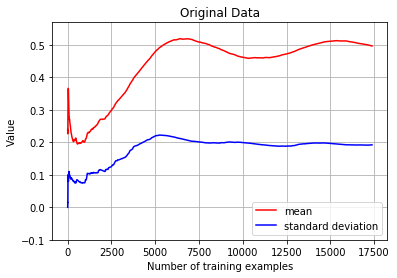

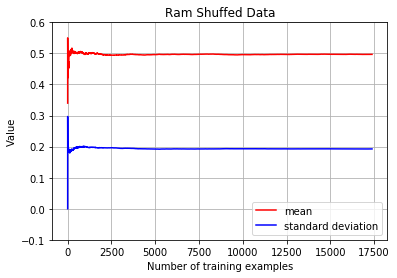

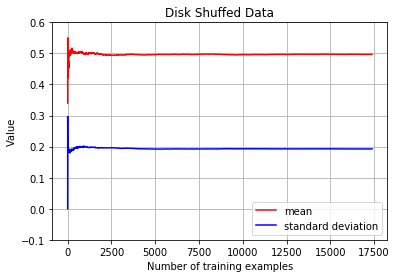

In [15]:
import csv, math
import pandas as pd
import matplotlib.pyplot as plt
# import os

class StreamStat:
    def __init__(self, fileName, feature, title):
        self.fileName = fileName
        self.feature = feature
        self.title = title
        
    def meanStd(self):
        running_mean = list()
        running_std = list()

        with open(self.fileName, 'r') as R:
            iterator = csv.DictReader(R, delimiter=',')    
            first = next(iterator)
            m = float(first[self.feature])
            s = 0.
            running_mean.append(m)
            running_std.append(s)
        
            for n, row in enumerate(iterator):
                n = n + 2
                x = float(row[self.feature])
                s = s + (1. - 1./n) * (x - m) * (x - m)
                m = ((n-1) * m + x)/n
                running_mean.append(m)
                running_std.append(math.sqrt(s/(n-1)))
            
        return(pd.DataFrame({'mean': running_mean, 'std': running_std}))
    
    def plot(self):
        data = StreamStat.meanStd(self)
        minY = min(data.min())
        maxY = max(data.max())
        
        plt.plot(data['mean'],'r-', label='mean')
        plt.plot(data['std'], 'b-', label='standard deviation')
        plt.title(self.title)
        plt.ylim(minY-0.1, maxY+ 0.05)
        plt.xlabel('Number of training examples')
        plt.ylabel('Value')
        plt.legend(loc='lower right', numpoints= 1)
        plt.grid(True)
        plt.show()        
        

#local_path = os.getcwd() + os.sep
local_path = './'

original = local_path + 'bikesharing/hour.csv'
shuffled = local_path + 'bikesharing/hour_RamShuffled.csv'
disk_shuffled = local_path + 'bikesharing/hour_DiskShuffled.csv'

nonShuff = StreamStat(original, 'temp', "Original Data")
nonShuff.plot()
plt.show()
shuff = StreamStat(shuffled, 'temp', "Ram Shuffed Data")
shuff.plot()
plt.show()
Dshuff = StreamStat(shuffled, 'temp', "Disk Shuffed Data")
Dshuff.plot()
plt.show()